# Verano FIME 2021

# (2015)

# PM2.5

In [2]:
# Se importan las librerias necesarias
import pandas as pd
# Se declara una variable con el nombre del contaminante a analizar
contaminante1 = 'PM2_5'
# Se declaran las columnas a extraer de la base de datos
columns1 = ['timestamp', contaminante1]
# Se lee el archivo y los datos recuperados se guardan en 'dataframecontaminante'
dataframecontaminante1 = pd.read_csv('filled.csv', usecols=columns1).dropna()
# Se convierten los strings a objeto datetime
strfdt1 = '%d-%b-%y %H'
dataframecontaminante1['timestamp'] = pd.to_datetime(dataframecontaminante1['timestamp'], errors = 'coerce', format=strfdt1)
# Se eliminan los espacios vacios
dataframecontaminante1 = dataframecontaminante1.dropna()
# Se acomoda el indice empezando en 0 con un incremento de 1
dataframecontaminante1 = dataframecontaminante1.reset_index(drop=True)
# Se imprime 'dataframecontaminante'
dataframecontaminante1

,timestamp,PM2_5
0,2003-06-01 00:00:00,99.00
1,2003-06-01 00:00:00,62.00
2,2003-06-01 00:00:00,29.00
3,2003-06-01 01:00:00,98.00
4,2003-06-01 01:00:00,75.00
...,...,...
528438,2018-12-31 23:00:00,22.58
528439,2018-12-31 23:00:00,199.00
528440,2018-12-31 23:00:00,111.00
528441,2018-12-31 23:00:00,295.00


In [3]:
# Los datos de la columna 'timestamp' se vuelven a convertir a strings
dataframecontaminante1['timestamp'] = dataframecontaminante1['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H'))
dataframecontaminante1

,timestamp,PM2_5
0,2003-06-01 00,99.00
1,2003-06-01 00,62.00
2,2003-06-01 00,29.00
3,2003-06-01 01,98.00
4,2003-06-01 01,75.00
...,...,...
528438,2018-12-31 23,22.58
528439,2018-12-31 23,199.00
528440,2018-12-31 23,111.00
528441,2018-12-31 23,295.00


In [4]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2015'
dataframecontaminanteaño1 = dataframecontaminante1.loc[dataframecontaminante1['timestamp'].str.startswith(año)]
dataframecontaminanteaño1 = dataframecontaminanteaño1.reset_index(drop=True)
dataframecontaminanteaño1

,timestamp,PM2_5
0,2015-01-01 00,17.0
1,2015-01-01 01,80.0
2,2015-01-01 01,27.0
3,2015-01-01 01,169.0
4,2015-01-01 01,15.0
...,...,...
38100,2015-12-31 23,46.0
38101,2015-12-31 23,88.0
38102,2015-12-31 23,75.0
38103,2015-12-31 23,39.0


In [5]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño1['timestamp'] = pd.to_datetime(dataframecontaminanteaño1['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño1

,timestamp,PM2_5
0,2015-01-01 00:00:00,17.0
1,2015-01-01 01:00:00,80.0
2,2015-01-01 01:00:00,27.0
3,2015-01-01 01:00:00,169.0
4,2015-01-01 01:00:00,15.0
...,...,...
38100,2015-12-31 23:00:00,46.0
38101,2015-12-31 23:00:00,88.0
38102,2015-12-31 23:00:00,75.0
38103,2015-12-31 23:00:00,39.0


In [6]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño1['sem'] = dataframecontaminanteaño1['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño1['sem'] = dataframecontaminanteaño1['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño1['sem'] = dataframecontaminanteaño1['sem'].apply(lambda x: x.week)
dataframecontaminanteaño1

,timestamp,PM2_5,sem
0,2015-01-01 00:00:00,17.0,53
1,2015-01-01 01:00:00,80.0,53
2,2015-01-01 01:00:00,27.0,53
3,2015-01-01 01:00:00,169.0,53
4,2015-01-01 01:00:00,15.0,53
...,...,...,...
38100,2015-12-31 23:00:00,46.0,52
38101,2015-12-31 23:00:00,88.0,52
38102,2015-12-31 23:00:00,75.0,52
38103,2015-12-31 23:00:00,39.0,52


In [7]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de lecturas tomadas en cada semana
semanascontaminante1 = dataframecontaminanteaño1['sem'].value_counts()
semanascontaminante1 = semanascontaminante1.sort_index()
semanascontaminante1

1     717
2     768
3     779
4     901
5     879
6     917
7     990
8     879
9     935
10    976
11    935
12    818
13    742
14    766
15    753
16    725
17    781
18    861
19    916
20    780
21    622
22    610
23    670
24    697
25    766
26    655
27    820
28    755
29    564
30    677
31    842
32    780
33    609
34    662
35    586
36    524
37    544
38    599
39    749
40    489
41    656
42    484
43    700
44    718
45    537
46    482
47    589
48    748
49    759
50    753
51    841
52    521
53    279
Name: sem, dtype: int64

In [8]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño1 = pd.DataFrame()
dataframesemanascontaminanteaño1['sem'] = semanascontaminante1.index
dataframesemanascontaminanteaño1[contaminante1] = ''
n = len(semanascontaminante1.index)
for i in range (n):
    registrossem = dataframecontaminanteaño1.loc[dataframecontaminanteaño1['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante1].mean()
    dataframesemanascontaminanteaño1[contaminante1][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño1

/var/folders/wg/hygnclps3m338py3t_qv5gxw0000gn/T/ipykernel_88336/3779165028.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño1[contaminante1][i] = promediocontaminanteañosem


,sem,PM2_5
0,1,23.58159
1,2,28.459635
2,3,26.091142
3,4,24.500555
4,5,27.313993
5,6,27.202835
6,7,30.406061
7,8,23.86917
8,9,26.325134
9,10,29.423156


In [9]:
dataset1 = []
for i in dataframesemanascontaminanteaño1.index:
    dataset1.append(dataframesemanascontaminanteaño1[contaminante1][i])
dataset1

[23.581589958158997,
 28.459635416666668,
 26.09114249037227,
 24.500554938956714,
 27.313993174061434,
 27.202835332606323,
 30.406060606060606,
 23.869169510807737,
 26.32513368983957,
 29.423155737704917,
 31.805347593582887,
 28.229828850855746,
 33.34636118598383,
 31.06135770234987,
 29.349269588313412,
 31.623448275862067,
 20.499359795134442,
 30.343786295005806,
 29.83187772925764,
 30.174358974358974,
 28.694533762057876,
 19.53934426229508,
 22.240298507462686,
 23.190817790530847,
 29.485639686684074,
 25.825954198473283,
 27.882926829268293,
 29.796026490066225,
 27.833333333333332,
 27.700147710487446,
 27.779097387173397,
 22.642307692307693,
 24.92775041050903,
 22.354984894259818,
 24.619453924914676,
 27.688931297709924,
 19.658088235294116,
 17.41068447412354,
 23.252336448598133,
 20.257668711656443,
 22.225609756097562,
 21.388429752066116,
 24.104285714285716,
 25.91225626740947,
 20.75977653631285,
 26.910788381742737,
 19.32427843803056,
 27.82620320855615,
 34.

# PM10

In [10]:
# Se importan las librerias necesarias
import pandas as pd
# Se declara una variable con el nombre del contaminante a analizar
contaminante2 = 'PM10'
# Se declaran las columnas a extraer de la base de datos
columns2 = ['timestamp', contaminante2]
# Se lee el archivo y los datos recuperados se guardan en 'dataframecontaminante'
dataframecontaminante2 = pd.read_csv('filled.csv', usecols=columns2).dropna()
# Se convierten los strings a objeto datetime
strfdt2 = '%d-%b-%y %H'
dataframecontaminante2['timestamp'] = pd.to_datetime(dataframecontaminante2['timestamp'], errors = 'coerce', format=strfdt2)
# Se eliminan los espacios vacios
dataframecontaminante2 = dataframecontaminante2.dropna()
# Se acomoda el indice empezando en 0 con un incremento de 1
dataframecontaminante2 = dataframecontaminante2.reset_index(drop=True)
# Se imprime 'dataframecontaminante'
dataframecontaminante2

,timestamp,PM10
0,1993-01-01 00:00:00,41.0
1,1993-01-01 00:00:00,30.5
2,1993-01-01 00:00:00,60.0
3,1993-01-01 00:00:00,38.5
4,1993-01-01 01:00:00,41.0
...,...,...
1382706,2018-12-31 23:00:00,445.0
1382707,2018-12-31 23:00:00,134.0
1382708,2018-12-31 23:00:00,392.0
1382709,2018-12-31 23:00:00,40.0


In [11]:
# Los datos de la columna 'timestamp' se vuelven a convertir a strings
dataframecontaminante2['timestamp'] = dataframecontaminante2['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H'))
dataframecontaminante2

,timestamp,PM10
0,1993-01-01 00,41.0
1,1993-01-01 00,30.5
2,1993-01-01 00,60.0
3,1993-01-01 00,38.5
4,1993-01-01 01,41.0
...,...,...
1382706,2018-12-31 23,445.0
1382707,2018-12-31 23,134.0
1382708,2018-12-31 23,392.0
1382709,2018-12-31 23,40.0


In [12]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
dataframecontaminanteaño2 = dataframecontaminante2.loc[dataframecontaminante2['timestamp'].str.startswith(año)]
dataframecontaminanteaño2 = dataframecontaminanteaño2.reset_index(drop=True)
dataframecontaminanteaño2

,timestamp,PM10
0,2015-01-01 00,37.0
1,2015-01-01 00,60.0
2,2015-01-01 00,26.0
3,2015-01-01 00,89.0
4,2015-01-01 00,66.0
...,...,...
79126,2015-12-31 23,49.0
79127,2015-12-31 23,37.0
79128,2015-12-31 23,42.0
79129,2015-12-31 23,74.0


In [13]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño2['timestamp'] = pd.to_datetime(dataframecontaminanteaño2['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño2

,timestamp,PM10
0,2015-01-01 00:00:00,37.0
1,2015-01-01 00:00:00,60.0
2,2015-01-01 00:00:00,26.0
3,2015-01-01 00:00:00,89.0
4,2015-01-01 00:00:00,66.0
...,...,...
79126,2015-12-31 23:00:00,49.0
79127,2015-12-31 23:00:00,37.0
79128,2015-12-31 23:00:00,42.0
79129,2015-12-31 23:00:00,74.0


In [14]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño2['sem'] = dataframecontaminanteaño2['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño2['sem'] = dataframecontaminanteaño2['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño2['sem'] = dataframecontaminanteaño2['sem'].apply(lambda x: x.week)
dataframecontaminanteaño2

,timestamp,PM10,sem
0,2015-01-01 00:00:00,37.0,53
1,2015-01-01 00:00:00,60.0,53
2,2015-01-01 00:00:00,26.0,53
3,2015-01-01 00:00:00,89.0,53
4,2015-01-01 00:00:00,66.0,53
...,...,...,...
79126,2015-12-31 23:00:00,49.0,52
79127,2015-12-31 23:00:00,37.0,52
79128,2015-12-31 23:00:00,42.0,52
79129,2015-12-31 23:00:00,74.0,52


In [15]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de lecturas tomadas en cada semana
semanascontaminante2 = dataframecontaminanteaño2['sem'].value_counts()
semanascontaminante2 = semanascontaminante2.sort_index()
semanascontaminante2

1     1595
2     1464
3     1610
4     1644
5     1577
6     1653
7     1606
8     1471
9     1577
10    1484
11    1425
12    1509
13    1481
14    1408
15    1396
16    1355
17    1593
18    1412
19    1570
20    1580
21    1588
22    1538
23    1500
24    1186
25    1385
26    1471
27    1552
28    1542
29    1502
30    1542
31    1538
32    1470
33    1355
34    1411
35    1550
36    1511
37    1387
38    1562
39    1622
40    1597
41    1491
42    1585
43    1497
44    1627
45    1529
46    1518
47    1492
48    1601
49    1562
50    1604
51    1548
52    1176
53     682
Name: sem, dtype: int64

In [16]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño2 = pd.DataFrame()
dataframesemanascontaminanteaño2['sem'] = semanascontaminante2.index
dataframesemanascontaminanteaño2[contaminante2] = ''
n = len(semanascontaminante2.index)
for i in range (n):
    registrossem = dataframecontaminanteaño2.loc[dataframecontaminanteaño2['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante2].mean()
    dataframesemanascontaminanteaño2[contaminante2][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño2

/var/folders/wg/hygnclps3m338py3t_qv5gxw0000gn/T/ipykernel_88336/1374211484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño2[contaminante2][i] = promediocontaminanteañosem


,sem,PM10
0,1,68.988088
1,2,86.17623
2,3,94.648447
3,4,94.568735
4,5,72.864933
5,6,87.193587
6,7,97.136986
7,8,64.924541
8,9,70.800888
9,10,71.327493


In [17]:
dataset2 = []
for i in dataframesemanascontaminanteaño2.index:
    dataset2.append(dataframesemanascontaminanteaño2[contaminante2][i])
dataset2

[68.98808777429467,
 86.17622950819673,
 94.64844720496895,
 94.56873479318735,
 72.86493341788206,
 87.1935874168179,
 97.13698630136986,
 64.92454112848402,
 70.80088776157261,
 71.32749326145553,
 78.12421052631579,
 87.78263750828363,
 83.38960162052668,
 75.11931818181819,
 73.50071633237822,
 75.57859778597786,
 60.728813559322035,
 69.12110481586403,
 71.2859872611465,
 69.62468354430379,
 75.75692695214106,
 51.73992197659298,
 50.568,
 58.40809443507589,
 77.05415162454874,
 67.40584636301836,
 76.61855670103093,
 72.98962386511025,
 67.11584553928095,
 70.50843060959792,
 69.6111833550065,
 60.215646258503405,
 59.76678966789668,
 51.6194188518781,
 51.39741935483871,
 55.72865651886168,
 42.67844268204758,
 43.096030729833544,
 56.63378545006165,
 41.90920475892298,
 51.9738430583501,
 45.86435331230284,
 61.21710086840347,
 56.405654578979714,
 48.75931981687378,
 65.80171277997366,
 47.74530831099196,
 65.57089319175515,
 98.92061459667093,
 77.98815461346634,
 100.0167958

# NOX

In [18]:
# Se importan las librerias necesarias
import pandas as pd
# Se declara una variable con el nombre del contaminante a analizar
contaminante3 = 'NOX'
# Se declaran las columnas a extraer de la base de datos
columns3 = ['timestamp', contaminante3]
# Se lee el archivo y los datos recuperados se guardan en 'dataframecontaminante'
dataframecontaminante3 = pd.read_csv('filled.csv', usecols=columns3).dropna()
# Se convierten los strings a objeto datetime
strfdt3 = '%d-%b-%y %H'
dataframecontaminante3['timestamp'] = pd.to_datetime(dataframecontaminante3['timestamp'], errors = 'coerce', format=strfdt3)
# Se eliminan los espacios vacios
dataframecontaminante3 = dataframecontaminante3.dropna()
# Se acomoda el indice empezando en 0 con un incremento de 1
dataframecontaminante3 = dataframecontaminante3.reset_index(drop=True)
# Se imprime 'dataframecontaminante'
dataframecontaminante3

,timestamp,NOX
0,1993-01-01 00:00:00,6.750000
1,1993-01-01 00:00:00,8.500000
2,1993-01-01 00:00:00,11.000000
3,1993-01-01 00:00:00,17.500000
4,1993-01-01 01:00:00,4.000000
...,...,...
1128925,2018-12-31 23:00:00,74.400002
1128926,2018-12-31 23:00:00,207.000000
1128927,2018-12-31 23:00:00,27.000000
1128928,2018-12-31 23:00:00,70.099998


In [19]:
# Los datos de la columna 'timestamp' se vuelven a convertir a strings
dataframecontaminante3['timestamp'] = dataframecontaminante3['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H'))
dataframecontaminante3

,timestamp,NOX
0,1993-01-01 00,6.750000
1,1993-01-01 00,8.500000
2,1993-01-01 00,11.000000
3,1993-01-01 00,17.500000
4,1993-01-01 01,4.000000
...,...,...
1128925,2018-12-31 23,74.400002
1128926,2018-12-31 23,207.000000
1128927,2018-12-31 23,27.000000
1128928,2018-12-31 23,70.099998


In [20]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
dataframecontaminanteaño3 = dataframecontaminante3.loc[dataframecontaminante3['timestamp'].str.startswith(año)]
dataframecontaminanteaño3 = dataframecontaminanteaño3.reset_index(drop=True)
dataframecontaminanteaño3

,timestamp,NOX
0,2015-01-01 00,21.900000
1,2015-01-01 00,10.600000
2,2015-01-01 00,9.200000
3,2015-01-01 00,6.600000
4,2015-01-01 00,6.200000
...,...,...
44489,2015-12-31 23,3.500000
44490,2015-12-31 23,24.600000
44491,2015-12-31 23,32.900002
44492,2015-12-31 23,13.600000


In [21]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño3['timestamp'] = pd.to_datetime(dataframecontaminanteaño3['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño3

,timestamp,NOX
0,2015-01-01 00:00:00,21.900000
1,2015-01-01 00:00:00,10.600000
2,2015-01-01 00:00:00,9.200000
3,2015-01-01 00:00:00,6.600000
4,2015-01-01 00:00:00,6.200000
...,...,...
44489,2015-12-31 23:00:00,3.500000
44490,2015-12-31 23:00:00,24.600000
44491,2015-12-31 23:00:00,32.900002
44492,2015-12-31 23:00:00,13.600000


In [22]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño3['sem'] = dataframecontaminanteaño3['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño3['sem'] = dataframecontaminanteaño3['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño3['sem'] = dataframecontaminanteaño3['sem'].apply(lambda x: x.week)
dataframecontaminanteaño3

,timestamp,NOX,sem
0,2015-01-01 00:00:00,21.900000,53
1,2015-01-01 00:00:00,10.600000,53
2,2015-01-01 00:00:00,9.200000,53
3,2015-01-01 00:00:00,6.600000,53
4,2015-01-01 00:00:00,6.200000,53
...,...,...,...
44489,2015-12-31 23:00:00,3.500000,52
44490,2015-12-31 23:00:00,24.600000,52
44491,2015-12-31 23:00:00,32.900002,52
44492,2015-12-31 23:00:00,13.600000,52


In [23]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de lecturas tomadas en cada semana
semanascontaminante3 = dataframecontaminanteaño3['sem'].value_counts()
semanascontaminante3 = semanascontaminante3.sort_index()
semanascontaminante3

1     1000
2     1000
3      990
4     1002
5      910
6     1005
7     1002
8     1006
9     1168
10    1065
11    1005
12    1002
13     986
14     818
15     638
16     585
17     538
18     668
19     686
20     671
21     696
22     592
23     626
24     653
25     695
26     785
27     790
28     839
29     814
30     834
31     840
32     821
33     710
34     771
35     692
36     874
37     920
38     824
39     842
40     853
41     858
42     862
43     902
44    1012
45     987
46     942
47     807
48     940
49     954
50     958
51     947
52     682
53     427
Name: sem, dtype: int64

In [24]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño3 = pd.DataFrame()
dataframesemanascontaminanteaño3['sem'] = semanascontaminante3.index
dataframesemanascontaminanteaño3[contaminante3] = ''
n = len(semanascontaminante3.index)
for i in range (n):
    registrossem = dataframecontaminanteaño3.loc[dataframecontaminanteaño3['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante3].mean()
    dataframesemanascontaminanteaño3[contaminante3][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño3

/var/folders/wg/hygnclps3m338py3t_qv5gxw0000gn/T/ipykernel_88336/802629888.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño3[contaminante3][i] = promediocontaminanteañosem


,sem,NOX
0,1,27.2419
1,2,36.2909
2,3,31.404242
3,4,33.546707
4,5,28.747143
5,6,29.656219
6,7,29.458882
7,8,22.461928
8,9,20.311729
9,10,27.379906


In [25]:
dataset3 = []
for i in dataframesemanascontaminanteaño3.index:
    dataset3.append(dataframesemanascontaminanteaño3[contaminante3][i])
dataset3

[27.2419,
 36.29089999999999,
 31.404242424242426,
 33.54670658682635,
 28.747142857142858,
 29.656218905472638,
 29.458882235528943,
 22.461928429423455,
 20.31172945205479,
 27.379906103286384,
 24.001990049751242,
 18.983832335329343,
 23.938539553752538,
 16.681173594132026,
 19.10783699059561,
 19.62974358974359,
 16.346654275092938,
 14.429640718562874,
 12.942274052478133,
 13.218777943368108,
 11.0691091954023,
 9.826689189189189,
 9.905111821086262,
 12.080398162327718,
 10.240143884892086,
 10.259490433149276,
 9.879999997872337,
 10.125148991649,
 10.30626536496441,
 10.589448446006799,
 9.836190476190477,
 11.27661388550548,
 11.869014084507043,
 10.66952010376135,
 12.42384393063584,
 14.579862700228833,
 13.829999999999998,
 15.358252427184468,
 20.313657957244654,
 17.284759671746777,
 21.545104895104895,
 17.234570765661253,
 27.46862527716186,
 21.88695652173913,
 21.640628166160084,
 29.922611464968153,
 22.077447335811648,
 31.082872340019716,
 46.67211740041929,
 38

# NO2

In [26]:
# Se importan las librerias necesarias
import pandas as pd
# Se declara una variable con el nombre del contaminante a analizar
contaminante4 = 'NO2'
# Se declaran las columnas a extraer de la base de datos
columns4 = ['timestamp', contaminante4]
# Se lee el archivo y los datos recuperados se guardan en 'dataframecontaminante'
dataframecontaminante4 = pd.read_csv('filled.csv', usecols=columns4).dropna()
# Se convierten los strings a objeto datetime
strfdt4 = '%d-%b-%y %H'
dataframecontaminante4['timestamp'] = pd.to_datetime(dataframecontaminante4['timestamp'], errors = 'coerce', format=strfdt4)
# Se eliminan los espacios vacios
dataframecontaminante4 = dataframecontaminante4.dropna()
# Se acomoda el indice empezando en 0 con un incremento de 1
dataframecontaminante4 = dataframecontaminante4.reset_index(drop=True)
# Se imprime 'dataframecontaminante'
dataframecontaminante4

,timestamp,NO2
0,1993-01-01 00:00:00,5.750000
1,1993-01-01 00:00:00,11.000000
2,1993-01-01 00:00:00,6.750000
3,1993-01-01 00:00:00,14.250000
4,1993-01-01 01:00:00,3.250000
...,...,...
1130352,2018-12-31 23:00:00,21.600000
1130353,2018-12-31 23:00:00,31.400000
1130354,2018-12-31 23:00:00,8.400000
1130355,2018-12-31 23:00:00,11.800000


In [27]:
# Los datos de la columna 'timestamp' se vuelven a convertir a strings
dataframecontaminante4['timestamp'] = dataframecontaminante4['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H'))
dataframecontaminante4

,timestamp,NO2
0,1993-01-01 00,5.750000
1,1993-01-01 00,11.000000
2,1993-01-01 00,6.750000
3,1993-01-01 00,14.250000
4,1993-01-01 01,3.250000
...,...,...
1130352,2018-12-31 23,21.600000
1130353,2018-12-31 23,31.400000
1130354,2018-12-31 23,8.400000
1130355,2018-12-31 23,11.800000


In [28]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
dataframecontaminanteaño4 = dataframecontaminante4.loc[dataframecontaminante4['timestamp'].str.startswith(año)]
dataframecontaminanteaño4 = dataframecontaminanteaño4.reset_index(drop=True)
dataframecontaminanteaño4

,timestamp,NO2
0,2015-01-01 00,13.1
1,2015-01-01 00,8.0
2,2015-01-01 00,4.2
3,2015-01-01 00,3.7
4,2015-01-01 00,4.5
...,...,...
44482,2015-12-31 23,1.6
44483,2015-12-31 23,8.6
44484,2015-12-31 23,7.9
44485,2015-12-31 23,8.2


In [29]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño4['timestamp'] = pd.to_datetime(dataframecontaminanteaño4['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño4

,timestamp,NO2
0,2015-01-01 00:00:00,13.1
1,2015-01-01 00:00:00,8.0
2,2015-01-01 00:00:00,4.2
3,2015-01-01 00:00:00,3.7
4,2015-01-01 00:00:00,4.5
...,...,...
44482,2015-12-31 23:00:00,1.6
44483,2015-12-31 23:00:00,8.6
44484,2015-12-31 23:00:00,7.9
44485,2015-12-31 23:00:00,8.2


In [30]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño4['sem'] = dataframecontaminanteaño4['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño4['sem'] = dataframecontaminanteaño4['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño4['sem'] = dataframecontaminanteaño4['sem'].apply(lambda x: x.week)
dataframecontaminanteaño4

,timestamp,NO2,sem
0,2015-01-01 00:00:00,13.1,53
1,2015-01-01 00:00:00,8.0,53
2,2015-01-01 00:00:00,4.2,53
3,2015-01-01 00:00:00,3.7,53
4,2015-01-01 00:00:00,4.5,53
...,...,...,...
44482,2015-12-31 23:00:00,1.6,52
44483,2015-12-31 23:00:00,8.6,52
44484,2015-12-31 23:00:00,7.9,52
44485,2015-12-31 23:00:00,8.2,52


In [31]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de lecturas tomadas en cada semana
semanascontaminante4 = dataframecontaminanteaño4['sem'].value_counts()
semanascontaminante4 = semanascontaminante4.sort_index()
semanascontaminante4

1      999
2     1000
3      990
4     1002
5      910
6     1003
7     1002
8     1006
9     1168
10    1065
11    1005
12    1002
13     986
14     818
15     638
16     585
17     538
18     668
19     686
20     671
21     696
22     592
23     625
24     653
25     695
26     785
27     790
28     840
29     824
30     835
31     838
32     821
33     707
34     767
35     692
36     874
37     920
38     824
39     842
40     853
41     858
42     862
43     902
44    1012
45     987
46     942
47     807
48     940
49     954
50     958
51     947
52     676
53     427
Name: sem, dtype: int64

In [32]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño4 = pd.DataFrame()
dataframesemanascontaminanteaño4['sem'] = semanascontaminante4.index
dataframesemanascontaminanteaño4[contaminante4] = ''
n = len(semanascontaminante4.index)
for i in range (n):
    registrossem = dataframecontaminanteaño4.loc[dataframecontaminanteaño4['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante4].mean()
    dataframesemanascontaminanteaño4[contaminante4][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño4

/var/folders/wg/hygnclps3m338py3t_qv5gxw0000gn/T/ipykernel_88336/1549920633.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño4[contaminante4][i] = promediocontaminanteañosem


,sem,NO2
0,1,14.521822
1,2,16.6357
2,3,17.880606
3,4,18.436327
4,5,15.193626
5,6,16.650748
6,7,15.785729
7,8,12.504573
8,9,11.399658
9,10,14.938685


In [33]:
dataset4 = []
for i in dataframesemanascontaminanteaño4.index:
    dataset4.append(dataframesemanascontaminanteaño4[contaminante4][i])
dataset4

[14.521821821821822,
 16.6357,
 17.880606060606063,
 18.43632734530938,
 15.193626373626374,
 16.65074775672981,
 15.785728542914171,
 12.504572564612326,
 11.399657534246575,
 14.93868544600939,
 12.348955223880598,
 11.140219560878243,
 9.097261663286003,
 9.096332518337409,
 11.42257053291536,
 11.865982905982907,
 11.062267657992566,
 8.389820359281437,
 7.633965014577259,
 7.164977645305514,
 5.964655172413792,
 4.975675675675676,
 4.5344,
 6.214395099540582,
 5.127625899280575,
 5.770445853555278,
 5.046202533833588,
 5.218452378454662,
 5.592111658500236,
 5.533652707659555,
 5.398568019093079,
 5.963459196102314,
 7.791937765205093,
 6.258930899608866,
 6.140751445086705,
 7.954004576659039,
 7.38108695652174,
 8.657038834951457,
 12.279691211401426,
 9.681008206330599,
 11.850466200466201,
 9.6707656612529,
 14.418514412416851,
 11.459486166007904,
 11.011955420466059,
 11.565286624203821,
 9.439529120198264,
 10.881595744325757,
 17.418343815513627,
 14.168058455114823,
 17.0

In [34]:
# Se importa el archivo creado
import visualization_spiderwebs

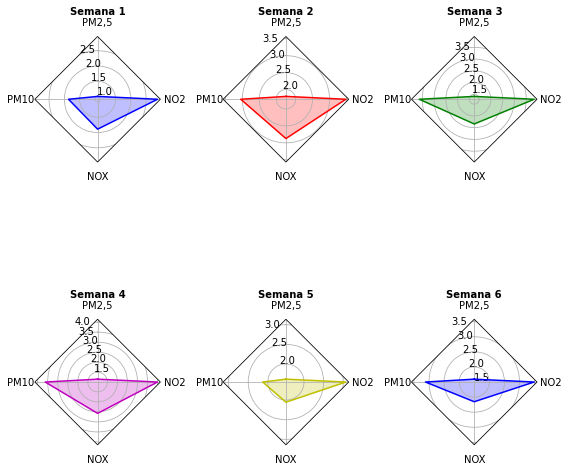

In [35]:
alldata = []
alldata.append(dataset1)
alldata.append(dataset2)
alldata.append(dataset3)
alldata.append(dataset4)
title = 'Contaminantes-'+año
spoke_labels = ['PM2,5','PM10','NOX','NO2']
titles = titles = ['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4', 'Semana 5', 'Semana 6']
colors = ['b', 'r', 'g', 'm', 'y', 'b']
visualization_spiderwebs.create_spiderwebs(alldata, 4, 6, title, titles, spoke_labels, colors, 'polygon')